In [143]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [144]:
# null hypothesis- one categorical
# F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['alcohol'],
# red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
# red_wine[red_wine['quality_label'] == 'high']['alcohol'])
# print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
# print('F Statistic:', F, '\tp-value:', p)

## Data Preparatrion

In [145]:
red_wine_heatmap = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_heatmap = pd.read_csv('winequality-white.csv', sep=';')

In [146]:
white_wine_heatmap

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### dropping duplicates and concatinating both datasets

In [147]:
white_wine_heatmap.drop_duplicates(inplace=True)
red_wine_heatmap.drop_duplicates(inplace=True)
white_wine_heatmap.reset_index(inplace=True)
red_wine_heatmap.reset_index(inplace=True)
red_wine_heatmap.drop(columns='index', inplace=True)
white_wine_heatmap.drop(columns='index', inplace=True)

In [148]:
white_wine_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [149]:
# add column wine type
red_wine_heatmap['wine type']='red'
white_wine_heatmap['wine type']='white'
wine=pd.concat([red_wine_heatmap, white_wine_heatmap], ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [150]:
numeric_wine=wine.iloc[:, 0:12]
corr=numeric_wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


### add quality label

In [151]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
wine['quality label'] = wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['quality label'] = pd.Categorical(wine['quality label'],
categories=['low', 'medium', 'high'])
# wine.drop('quality_label',inplace=True, axis=1)

In [152]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


### anova test to find out which features do not play a role

In [153]:
def anova_tests2(df):  
    
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    
    for feature in features:
        F, p = stats.f_oneway(
            df[df['quality label'] == 'low'][feature],
            df[df['quality label'] == 'medium'][feature],
            df[df['quality label'] == 'high'][feature]
        )
        if p > 0.05:
         print(f"ANOVA test for mean {feature} across wine samples with different quality ratings")
         print('F Statistic:', F, '\tp-value:', p)
        else:
         print("there is correlation")

In [154]:
anova_tests2(wine)


there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation


### encoding wine type

In [155]:
# changing wine type to 0 and 1
wine1=wine.copy()

In [156]:
wine1['wine type'].replace(['red', 'white'],
                        [0, 1], inplace=True)

### encoding quality label

In [157]:
from sklearn.preprocessing import OrdinalEncoder
# Create an instance of OrdinalEncoder

In [158]:
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
wine1['NumericalLabels'] = ordinal_encoder.fit_transform(wine1[['quality label']])

### dropping unnecessary columns

In [159]:
wine1.drop(columns='quality', inplace=True)

In [160]:
wine1.drop(columns='quality label', inplace=True)

In [161]:
wine1.drop(columns='wine type', inplace=True)


### finding outliers and removing them

In [162]:
#functions for finding outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [163]:
#functions for removing outliers by column
def remove_outliers(column):
    mean_value = column.mean()
    std_dev = column.std()
    threshold = 3 * std_dev
    outliers_mask = (column - mean_value).abs() > threshold
    return column[~outliers_mask]



In [164]:
# Apply the remove_outliers function to each column in the DataFrame
wine2 = wine1.apply(remove_outliers, axis=0)

# Now df_no_outliers contains the DataFrame without outliers in all columns

In [165]:
wine3=wine2.dropna().reset_index(drop=True)

In [166]:
wine2=wine2.dropna().reset_index(drop=True)

In [167]:
wine4=wine2.dropna().reset_index(drop=True)

In [168]:
wine2.shape

(4889, 12)

## Oversampling with SMOTE

In [169]:
from imblearn.over_sampling import SMOTE

In [170]:
from sklearn.datasets import make_classification
from collections import Counter

In [171]:
#importm library for dicidint the dataset into two 
from sklearn.model_selection import train_test_split

In [172]:
wine4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,NumericalLabels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
2,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.0
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0.0
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1.0


### dividing into X and y

In [173]:
wine3.drop(columns='NumericalLabels', inplace=True)

In [174]:

y=wine4['NumericalLabels'] # --> what you're trying to predict
X=wine3 # --> the features we will keep to build our model

In [222]:
wine3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
2,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [176]:
X.shape

(4889, 11)

In [177]:
y.shape

(4889,)

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [179]:
y_test.shape

(978,)

In [180]:
# Display class distribution before oversampling
print("Class Distribution Before SMOTE (Training Set):", Counter(y_train))

Class Distribution Before SMOTE (Training Set): Counter({1.0: 2374, 0.0: 1426, 2.0: 111})


In [181]:
# Apply SMOTE for oversampling only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [182]:
# Display class distribution after oversampling
print("Class Distribution After SMOTE (Training Set):", Counter(y_train_resampled))

Class Distribution After SMOTE (Training Set): Counter({1.0: 2374, 0.0: 2374, 2.0: 2374})


# Models

## Logistic Regression Mathod

### building LogisticsRegression

In [183]:
#building model Logistic Regression

from sklearn.linear_model import LogisticRegression

In [184]:
logistics_regression_model=LogisticRegression(random_state=52)

In [185]:
#fit the model
logistics_regression_model.fit(X_train_resampled, y_train_resampled)

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=52)

In [186]:
# prediction
predictions=logistics_regression_model.predict(X_test)

In [187]:
predictions

array([2., 1., 0., 0., 1., 2., 2., 0., 1., 1., 0., 2., 0., 1., 0., 0., 0.,
       2., 0., 0., 0., 0., 1., 0., 1., 0., 2., 0., 0., 2., 0., 1., 2., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       2., 0., 2., 2., 2., 2., 2., 0., 0., 2., 0., 2., 0., 1., 1., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 2., 1.,
       1., 1., 0., 0., 1., 0., 2., 1., 1., 0., 1., 0., 2., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 2., 0., 1., 1., 1., 1., 2., 0., 0., 2., 0., 1.,
       2., 1., 1., 1., 2., 1., 1., 0., 2., 2., 0., 2., 0., 2., 1., 0., 0.,
       0., 0., 0., 0., 2., 2., 2., 0., 1., 1., 1., 1., 1., 0., 0., 2., 0.,
       2., 1., 0., 0., 2., 1., 1., 2., 1., 2., 1., 2., 0., 0., 1., 1., 0.,
       0., 2., 0., 2., 1., 0., 0., 0., 2., 0., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 2., 1., 2., 2., 0., 2., 1., 2., 2., 0., 0., 0., 0., 0., 0.,
       2., 1., 0., 2., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 2., 1.

In [188]:
from sklearn.metrics import accuracy_score

In [189]:
acc=accuracy_score(y_test, predictions)
acc

0.49284253578732107

In [190]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## RESULTS

In [191]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.49284253578732107

Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.77      0.65       350
         1.0       0.73      0.31      0.44       593
         2.0       0.11      0.77      0.19        35

    accuracy                           0.49       978
   macro avg       0.47      0.62      0.43       978
weighted avg       0.65      0.49      0.51       978


Confusion Matrix:
[[269  63  18]
 [206 186 201]
 [  3   5  27]]


## Random Forest model

In [192]:
from sklearn.ensemble import RandomForestClassifier


In [193]:
RF_model= RandomForestClassifier(n_estimators= 100, criterion='entropy', random_state=445)

In [194]:
RF_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', random_state=445)

In [195]:
preds2= RF_model.predict(X_test)

In [196]:
preds2

array([1., 1., 0., 0., 1., 2., 2., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 2., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 1., 0., 0., 2., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 2., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 2., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 2., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 2., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 2., 1., 0.

In [197]:
acc=accuracy_score(y_test, preds2)
acc

0.7167689161554193

In [198]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## RESULTS

In [215]:
accuracy = accuracy_score(y_test, preds2)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, preds2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds2))

Accuracy: 0.7167689161554193

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70       350
         1.0       0.78      0.75      0.76       593
         2.0       0.15      0.20      0.17        35

    accuracy                           0.72       978
   macro avg       0.54      0.56      0.55       978
weighted avg       0.73      0.72      0.72       978


Confusion Matrix:
[[252  98   0]
 [112 442  39]
 [  1  27   7]]


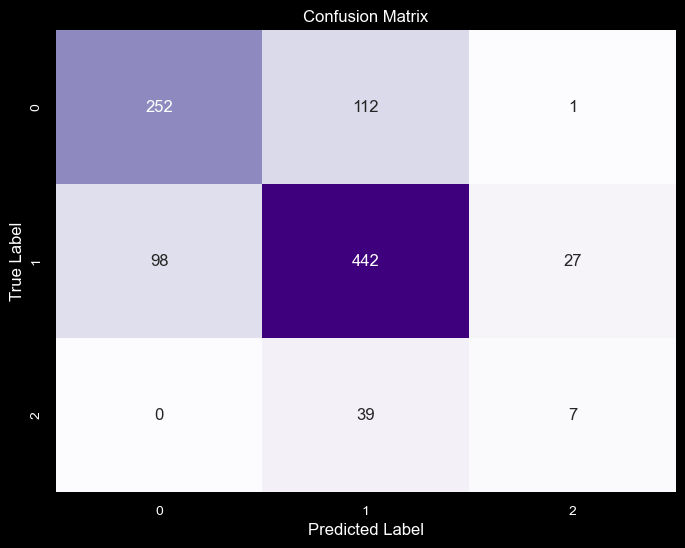

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
# Compute confusion matrix
cm = confusion_matrix(preds2, y_test)
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.title('Confusion Matrix', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.show()

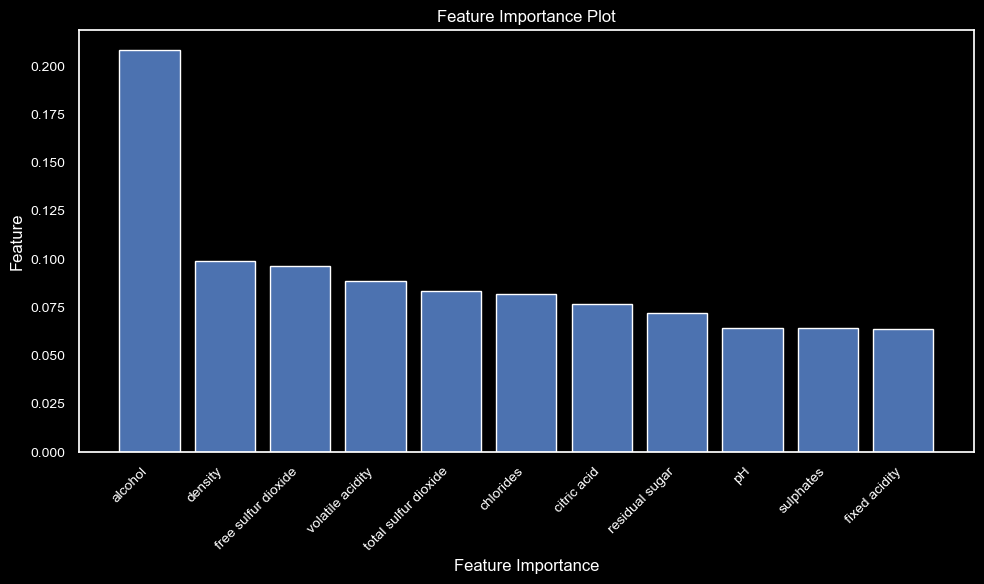

In [235]:

# Feature Importance Plot
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
plt.figure(figsize=(10, 6))
feat_importances = RF_model.feature_importances_
feat_names = wine4.columns[:-1]
indices = np.argsort(feat_importances)[::-1]
plt.bar(range(X.shape[1]), feat_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feat_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Feature Importance', color='white')
plt.ylabel('Feature', color='white')
plt.title('Feature Importance Plot', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.tight_layout()
plt.show()

In [221]:
# Assuming clf is your trained Random Forest classifier
# Plot feature importance





plt.xlabel('Feature Importance', color='white')
plt.ylabel('Feature', color='white')
plt.title('Feature Importance Plot', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.show()

KeyError: 'alcohol'

<Figure size 1000x600 with 0 Axes>

## KNN

In [200]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [201]:
# Initialize Min-Max scaler
#scaler = MinMaxScaler() or
scaler = StandardScaler()
# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [202]:
k = 5  # You can adjust this value based on your problem
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [203]:
y_pred3 = knn_model.predict(X_test_scaled)

## RESULTS

In [204]:
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Accuracy: 0.5961145194274029

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.72      0.65       350
         1.0       0.76      0.53      0.62       593
         2.0       0.11      0.46      0.18        35

    accuracy                           0.60       978
   macro avg       0.49      0.57      0.49       978
weighted avg       0.68      0.60      0.62       978


Confusion Matrix:
[[253  81  16]
 [169 314 110]
 [  2  17  16]]


## Support Vector Machines (SVM)

In [205]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [206]:

# Standardize the features (important for SVM)
# scaler = StandardScaler() or
scaler = MinMaxScaler() 
X_train_transformed = scaler.fit_transform(X_train_resampled)
X_test_transformed = scaler.transform(X_test)

In [207]:
X_train_transformed.shape

(7122, 11)

In [208]:
y_train_resampled.shape

(7122,)

In [209]:
X_test_transformed.shape

(978, 11)

In [210]:
y_test.shape

(978,)

In [211]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [212]:


# Train the SVM classifier
svm_classifier.fit(X_train_transformed, y_train_resampled)

# Make predictions on the test set
prediction4 = svm_classifier.predict(X_test_transformed)

## RESULT

In [213]:
# Evaluate the performance of the classifier
accuracy4 = accuracy_score(y_test, prediction4)
report4 = classification_report(y_test, prediction4)

# Print the results
print(f"Accuracy: {accuracy4:.2f}")
print("\nClassification Report:\n", report4)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction4))

Accuracy: 0.54

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.78      0.69       350
         1.0       0.77      0.39      0.52       593
         2.0       0.11      0.77      0.20        35

    accuracy                           0.54       978
   macro avg       0.50      0.65      0.47       978
weighted avg       0.69      0.54      0.57       978


Confusion Matrix:
[[274  59  17]
 [170 230 193]
 [  0   8  27]]
